In [1]:
import pandas as pd
import numpy as np
import os


In [2]:
labels=pd.read_csv('labels.csv')
labels.head()

,swim_id,stroke
0,eca387ee-efe3-4b52-b4ba-2ad59f9b3c56,Freestyle
1,ecc649a0-e9b7-4d89-bdb4-5446913720bf,Freestyle
2,9c3a0f82-003d-43d7-975a-0e63c2c59657,Freestyle
3,3b3dff00-08d4-4e19-8b56-ac95be0d755e,Freestyle
4,f2c736be-8c1a-4016-9cc9-d7875b40e996,BackStroke


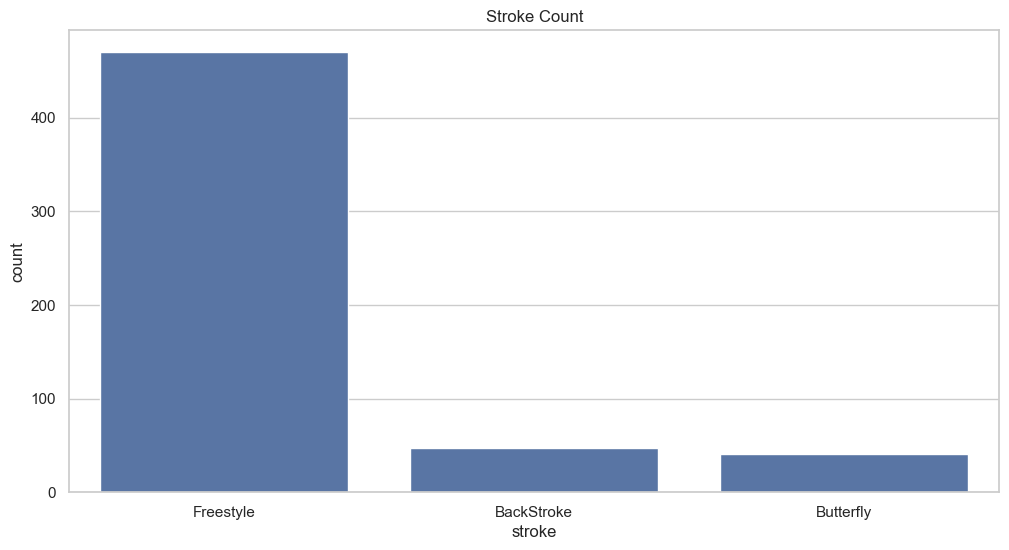

In [3]:
# show the count of stokes in labels in a bar chart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="stroke", data=labels)
plt.title('Stroke Count')
plt.show()




In [5]:
dirs='../combined_2'
files=os.listdir(dirs)
files=[f for f in files
       if f.endswith('.csv')]
files[:10]

['0057f3aa-a1ec-4d6a-9776-846f6e8fd0e4.csv',
 '00798875-f5bc-4ffe-a4f6-b8c38ffb6a6f.csv',
 '00d6b11e-bbcb-4e5b-aadf-5dc7212fd92e.csv',
 '01082af2-c81b-407a-a7cd-3cbd58ef860f.csv',
 '01189fe4-b286-480e-a724-8f2ca82e2a2f.csv',
 '01d1cd74-b3ee-472f-bf85-b84318451509.csv',
 '0289f9c2-ef67-45cb-9793-e1c5846970d7.csv',
 '02b8a1b3-6a99-4a1e-98d5-dbbc3f1898b6.csv',
 '0370272b-09b1-40d4-8d72-6c86765b3d4e.csv',
 '03c79948-9b13-47b7-aba4-84619cd8b24b.csv']

In [6]:
# print columns
df=pd.read_csv(os.path.join(dirs,files[0]))
print(df.columns)

Index(['timestamp_1', 'fPressureFront_1', 'fPressureSide_1',
       'acceleration.x_1', 'acceleration.y_1', 'acceleration.z_1',
       'quaternion.i_1', 'quaternion.j_1', 'quaternion.k_1',
       'quaternion.real_1', 'timestamp_2', 'fPressureFront_2',
       'fPressureSide_2', 'acceleration.x_2', 'acceleration.y_2',
       'acceleration.z_2', 'quaternion.i_2', 'quaternion.j_2',
       'quaternion.k_2', 'quaternion.real_2'],
      dtype='object')


In [7]:

data_lst=[]
label_lst = []
count=0
features=[ 'fPressureFront_1', 'fPressureSide_1',
       'acceleration.x_1', 'acceleration.y_1', 'acceleration.z_1',
       'quaternion.i_1', 'quaternion.j_1', 'quaternion.k_1',
        'fPressureFront_2',
       'fPressureSide_2', 'acceleration.x_2', 'acceleration.y_2',
       'acceleration.z_2', 'quaternion.i_2', 'quaternion.j_2',
       'quaternion.k_2' ]
for file in files:
    count += 1
    df = pd.read_csv(os.path.join(dirs, file))
    # Drop the rows with missing values
    df = df.dropna()

    data = df[features].values
    # split the data into 200 rows each, and append to the data_lst
    # This is done to match the labels with the data
    for i in range(200, min(7000,len(data)-200), 100):
        data_lst.append(data[i:i+200])
        file = file.split('.')[0]
        label_str = labels[labels['swim_id'] == file]['stroke'].values
        label_dict = {'Freestyle': 0, 'BackStroke': 1, 'Butterfly': 2, 'BreastStroke': 3}
        label = np.array([label_dict[label_str[0]]]) if label_str.size > 0 else np.array([])

        if label.size > 0:
            label_lst.append(label[0])
        else:
            print(f"No label found for file: {file}")
    
    if count % 100 == 0:
        print(f"Processed {count} files")

Processed 100 files
Processed 200 files
Processed 300 files
Processed 400 files
Processed 500 files


In [8]:
# print the count of each stroke
from collections import Counter
print(Counter(label_lst))

Counter({0: 23550, 1: 1772, 2: 1141})


In [9]:
# only keep 1000 data with labels 0,keep all data with labels 1,2
data_lst_new = []
label_lst_new = []
count = 0
for data, label in zip(data_lst, label_lst):
    if label == 0 and count < 1100:
        data_lst_new.append(data)
        label_lst_new.append(label)
        count += 1
    elif label != 0:
        data_lst_new.append(data)
        label_lst_new.append(label)
print(Counter(label_lst_new))


Counter({1: 1772, 2: 1141, 0: 1100})


In [10]:
from sklearn.model_selection import train_test_split

data_lst_new = np.transpose(data_lst_new, (0, 2, 1))
X_train, X_test, y_train, y_test = train_test_split(
    data_lst_new, label_lst_new, test_size=0.1, random_state=42, stratify=label_lst_new
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.11, random_state=42, stratify=y_train
)

print(f"Train size: {len(X_train)}")
print(f"Validation size: {len(X_val)}")
print(f"Test size: {len(X_test)}")

# convert three lists to numpy ndarray, and print the shape
X_train = np.array(X_train)
# exhange the second and third dimension
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print(X_train.shape)

Train size: 3213
Validation size: 398
Test size: 402
(3213, 16, 200)


In [62]:
# show the distribution of the labels in the train, validation and test sets

print("Train set distribution")
print(Counter(y_train))
print("Validation set distribution")
print(Counter(y_val))
print("Test set distribution")
print(Counter(y_test))


Train set distribution
Counter({np.int64(1): 1418, np.int64(2): 914, np.int64(0): 881})
Validation set distribution
Counter({np.int64(1): 176, np.int64(2): 113, np.int64(0): 109})
Test set distribution
Counter({np.int64(1): 178, np.int64(2): 114, np.int64(0): 110})


In [63]:
# this is in numpy3D format, but could also be pd-multiindex or other
y_train


array([0, 1, 0, ..., 1, 2, 2])

In [64]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.dists_kernels import FlatDist, ScipyDist

eucl_dist = FlatDist(ScipyDist())
clf = KNeighborsTimeSeriesClassifier(n_neighbors=5, distance=eucl_dist)


In [65]:
# step 4 - fit/train the classifierktime
clf.fit(X_train, y_train)

KNeighborsTimeSeriesClassifier(distance=FlatDist(transformer=ScipyDist()),
                               n_neighbors=5)

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# step 5 - predict labels on new data
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.92      0.79      0.85       110
           1       0.81      0.93      0.87       178
           2       0.82      0.74      0.78       114

    accuracy                           0.84       402
   macro avg       0.85      0.82      0.83       402
weighted avg       0.84      0.84      0.84       402



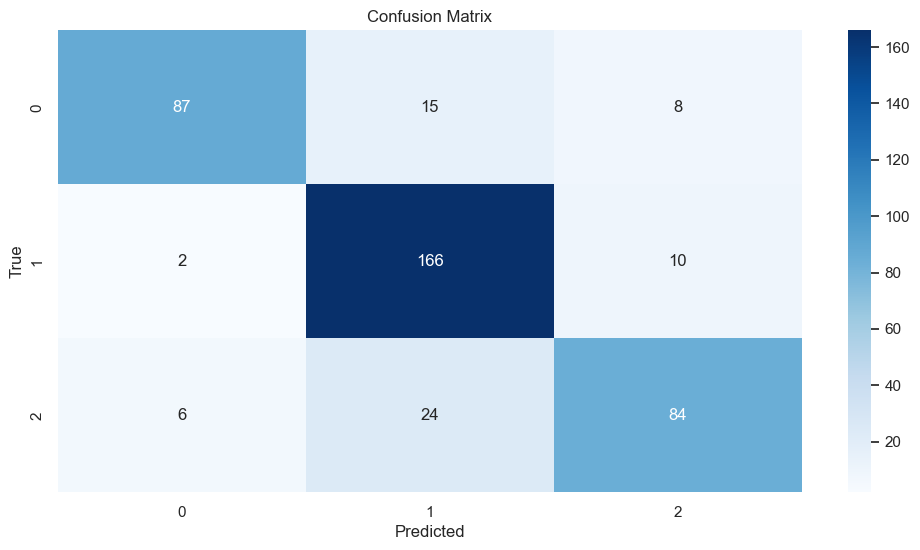

In [67]:
# print the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [17]:
from sktime.classification.kernel_based import RocketClassifier

rocket = RocketClassifier()
rocket.fit(X_train, y_train)
y_pred = rocket.predict(X_test)
accuracy_score(y_test, y_pred)


0.9378109452736318

In [18]:
# print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       110
           1       0.94      0.96      0.95       178
           2       0.93      0.92      0.93       114

    accuracy                           0.94       402
   macro avg       0.94      0.93      0.94       402
weighted avg       0.94      0.94      0.94       402



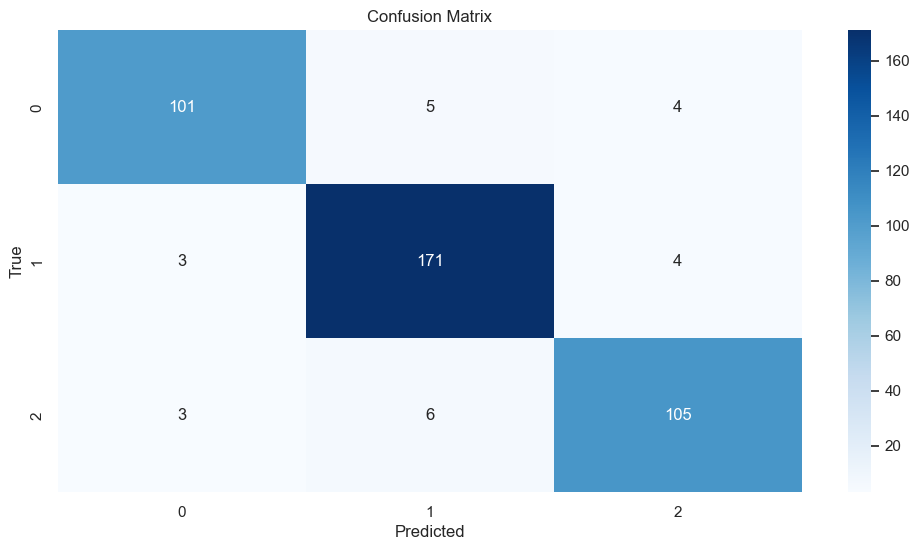

In [19]:
# show the confusion matrix, show the stroke name instead of the number
label_dict = {'Freestyle': 0, 'BackStroke': 1, 'Butterfly': 2, 'BreastStroke': 3}
# y_test = [label_dict[y] for y in y_test]
# y_pred = [label_dict[y] for y in y_pred]
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [3]:
from sktime.utils import mlflow_sktime  

model_dir='sktime_models'
mlflow_sktime.save_model(rocket, model_dir)

/Users/yixuanwang/Desktop/USYD/2024/Capstone/streamlit/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


NameError: name 'rocket' is not defined

In [4]:
from sktime.utils import mlflow_sktime  

model_uri = './sktime_models'

model = mlflow_sktime.load_model(model_uri=model_uri)
# print the model param
print(model.get_params())

{'max_dilations_per_kernel': 32, 'n_features_per_kernel': 4, 'n_jobs': 1, 'num_kernels': 10000, 'random_state': None, 'rocket_transform': 'rocket', 'use_multivariate': 'auto'}


In [10]:
# build the funciont to accept the data and return the prediction
test_data_dir='test_data'
left = pd.read_csv(os.path.join(test_data_dir, 'left2.csv'))
right = pd.read_csv(os.path.join(test_data_dir, 'right2.csv'))
def merge_files(left, right):
    left_copy = left.copy()
    right_copy = right.copy()
    left_copy.columns = [str(col) + '_1' for col in left_copy.columns]
    right_copy.columns = [str(col) + '_2' for col in right_copy.columns]
    merged_df = pd.concat([left_copy, right_copy], axis=1)
    merged_df.drop(columns=["timestamp_1", "timestamp_2", 'quaternion.accuracy_1', 'quaternion.accuracy_2', 'quaternion.real_1', 'quaternion.real_2'], inplace=True)
    merged_df = merged_df.dropna()

    return merged_df
merge_files(left,right)


,fPressureFront_1,fPressureSide_1,acceleration.x_1,acceleration.y_1,acceleration.z_1,quaternion.i_1,quaternion.j_1,quaternion.k_1,fPressureFront_2,fPressureSide_2,acceleration.x_2,acceleration.y_2,acceleration.z_2,quaternion.i_2,quaternion.j_2,quaternion.k_2
0,979.58860,979.88600,5.843750,1.261719,7.746094,-0.261719,-0.179443,-0.894226,981.45680,980.00710,-2.558594,3.195312,9.140625,-0.093750,0.184326,0.964783
1,979.59790,979.88745,3.394531,0.343750,9.882812,0.111938,-0.147217,0.447449,981.47240,980.02760,-2.863281,2.464844,9.406250,0.117737,0.154236,-0.014587
2,979.58180,979.91675,3.164062,0.113281,10.078125,0.109863,-0.147034,0.446960,981.43726,979.99585,-4.781250,2.160156,10.714844,0.118591,0.156189,-0.008423
3,979.57860,979.94165,3.468750,-0.578125,10.269531,0.110168,-0.151550,0.446045,981.44290,980.00390,-2.902344,2.429688,8.914062,0.118408,0.157959,-0.002808
4,979.61130,979.90380,3.929688,-0.804688,10.925781,0.111572,-0.153015,0.448120,981.45264,979.96680,-3.667969,2.199219,9.488281,0.120056,0.159424,0.003601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160734,990.62256,992.54297,-1.871094,7.796875,-3.304688,0.309509,0.762268,0.415710,982.47610,981.14087,3.417969,2.082031,8.996094,0.040405,-0.203552,-0.343872
160735,990.66530,992.55420,-1.757812,7.796875,-3.609375,0.288208,0.771362,0.433411,982.47830,981.17410,3.457031,2.199219,9.027344,0.041016,-0.203796,-0.344727
160736,990.54565,992.18460,-1.910156,7.914062,-3.878906,0.267578,0.779419,0.450012,982.43090,981.15186,3.496094,2.121094,9.023438,0.041504,-0.203735,-0.345215
160737,990.39280,992.19970,-2.062500,7.453125,-3.878906,0.246643,0.786926,0.465698,982.45140,981.16580,3.570312,1.968750,9.179688,0.042114,-0.203552,-0.345032


In [77]:

def split_data(df):
    count=0
    data_lst = []
    features = ['fPressureFront_1', 'fPressureSide_1',
       'acceleration.x_1', 'acceleration.y_1', 'acceleration.z_1',
       'quaternion.i_1', 'quaternion.j_1', 'quaternion.k_1',
        'fPressureFront_2',
       'fPressureSide_2', 'acceleration.x_2', 'acceleration.y_2',
       'acceleration.z_2', 'quaternion.i_2', 'quaternion.j_2',
       'quaternion.k_2' ]
    data = df[features].values
    for i in range(200, min(7000,len(data)-200), 100):
        data_lst.append(data[i:i+200])
        count += 1
    return count, data_lst



In [78]:
def predict_stroke(data_lst):
    data_lst = np.transpose(data_lst, (0, 2, 1))
    y_pred = model.predict(data_lst)

    return y_pred


In [47]:
def combined_flow(left,right):
    df = merge_files(left,right)
    count, data_lst = split_data(df)
    predicts = predict_stroke(data_lst)
    return predicts
